In [1]:
import pyxdf
import matplotlib.pyplot as plt
import numpy as np

from neurodsp import filt
from scipy import signal


dr = '/Users/colinwageman/Desktop/School/Cogs199/Recordings/odd_ball/'
file = 'run_01.xdf'


data, header = pyxdf.load_xdf(dr+file)

In [2]:
data

[{'info': defaultdict(list,
              {'name': ['P300_Markers'],
               'type': ['Markers'],
               'channel_count': ['1'],
               'channel_format': ['string'],
               'source_id': ['unsampledStream'],
               'nominal_srate': ['0.000000000000000'],
               'version': ['1.100000000000000'],
               'created_at': ['503845.9528012220'],
               'uid': ['6005108c-845d-4ecd-ab57-2d56116e56f5'],
               'session_id': ['default'],
               'hostname': ['Colins-MacBook-Pro.local'],
               'v4address': [None],
               'v4data_port': ['16574'],
               'v4service_port': ['16574'],
               'v6address': [None],
               'v6data_port': ['0'],
               'v6service_port': ['0'],
               'desc': [None],
               'stream_id': 3,
               'effective_srate': 0}),
  'footer': {'info': defaultdict(list,
               {'first_timestamp': ['503873.349374038'],
            

In [3]:
# number of markers
len(data[0]['time_series'])

150

In [4]:
print(data[0]['info']['name'])
print(data[1]['info']['name'])
print(data[2]['info']['name'])

['P300_Markers']
['aux_data']
['eeg_data']


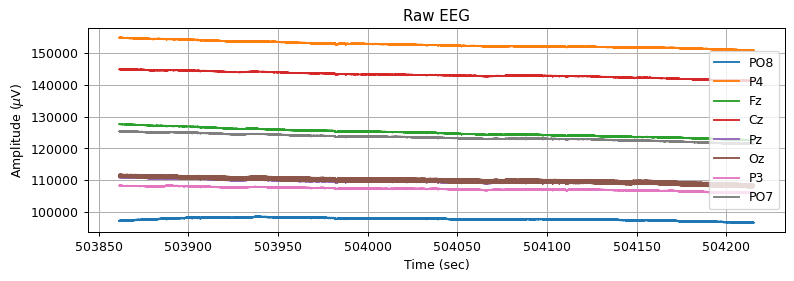

In [17]:
channels = ['PO8', 'P4', 'Fz', 'Cz', 'Pz', 'Oz', 'P3', 'PO7']

eeg_data = data[2]['time_series']
eeg_ts = data[2]['time_stamps']
sample_rate = float(data[2]['info']['nominal_srate'][0])

fig, ax = plt.subplots(figsize = (10, 3), dpi = 90)

for i in range(len(channels)):
    y = eeg_data[:,i]
    ax.plot(eeg_ts, y, label=channels[i])
    
ax.set_xlabel('Time (sec)')
ax.set_ylabel(r'Amplitude ($\mu$V)')
ax.set_title('Raw EEG')
ax.grid(True)
_ = ax.legend()

## Filter

In [18]:
def filter_eeg(ch_datas, sample_rate, f_range):
    nyq = 0.5 * FREQ
    low_limit = f_range[0] / nyq
    high_limit = f_range[1] / nyq
    
    sos = signal.butter(2, [low_limit, high_limit], btype='bandpass', output='sos')
    
    filtered = []
    for ch in ch_datas:
        sig_filt = signal.sosfiltfilt(sos, ch)    
        filtered.append(sig_filt)
    
    return np.array(filtered)

In [19]:
# Filtering in Hz
FREQ = 250.0 # sample rate
LOWCUT = 0.1
HIGHCUT = 15.0

freq_range = [LOWCUT,HIGHCUT]
eeg_filtered = filter_eeg(eeg_data.T, FREQ, freq_range)
eeg_filtered = eeg_filtered.T

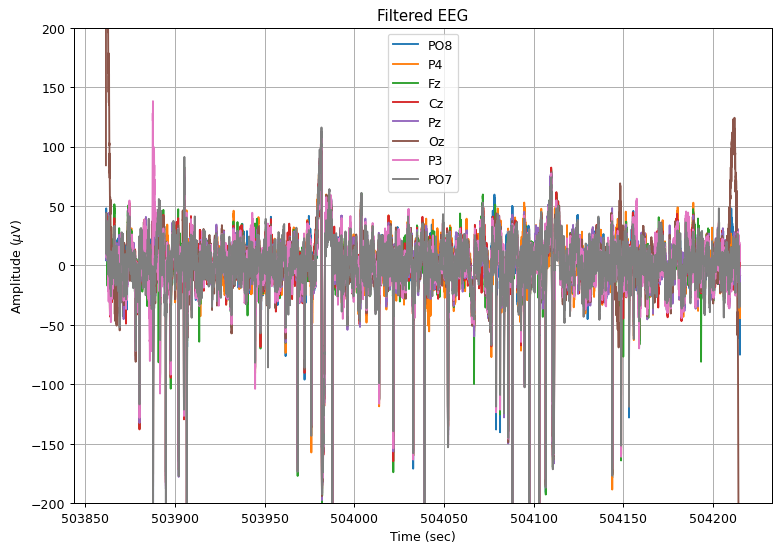

In [22]:
fig, ax = plt.subplots(figsize = (10, 7), dpi = 90)

for i in range(len(channels)):
    y = eeg_filtered[:,i]
    ax.plot(eeg_ts, y, label=channels[i])

ax.set_ylim([-200, 200])
ax.set_xlabel('Time (sec)')
ax.set_ylabel(r'Amplitude ($\mu$V)')
ax.set_title('Filtered EEG')
ax.grid(True)
_ = ax.legend()

## AUX Data (photosensor)

In [23]:
aux_data = data[1]['time_series']
aux_ts = data[1]['time_stamps']
aux_sample_rate = float(data[1]['info']['nominal_srate'][0])
print(aux_data.shape)
print(f'Sample Rate: {aux_sample_rate}')

(88386, 3)
Sample Rate: 250.0


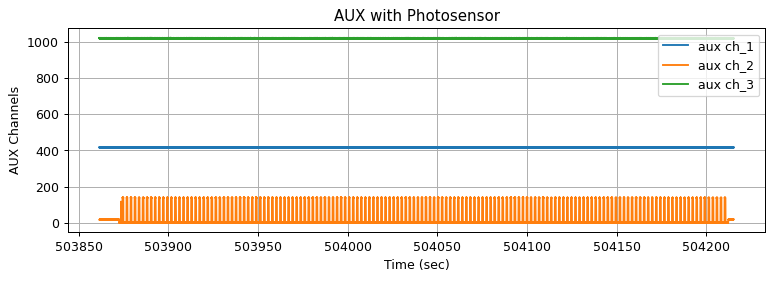

In [25]:
aux_chs = ['aux ch_1', 'aux ch_2', 'aux ch_3']

fig, ax = plt.subplots(figsize = (10, 3), dpi = 90)

for i in range(len(aux_chs)):
    y = aux_data[:,i]
    ax.plot(aux_ts, y, label=aux_chs[i])
    
ax.set_xlabel('Time (sec)')
ax.set_ylabel('AUX Channels')
ax.set_title('AUX with Photosensor')
ax.grid(True)
_ = ax.legend()

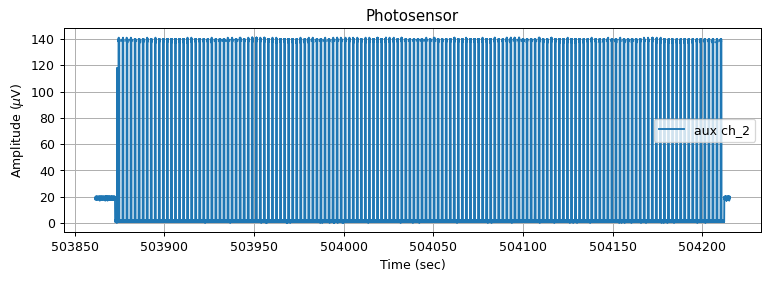

In [32]:
# photosensor on channel 2 = aux_data[:,1]
fig, ax = plt.subplots(figsize = (10, 3), dpi = 90)

y = aux_data[:,1]
ax.plot(aux_ts, y, label=aux_chs[1])
    
ax.set_xlabel('Time (sec)')
ax.set_ylabel(r'Amplitude ($\mu$V)')
ax.set_title('Photosensor')
ax.grid(True)
_ = ax.legend()

## Markers

In [27]:
marker_data = data[0]['time_series']
marker_ts = data[0]['time_stamps']

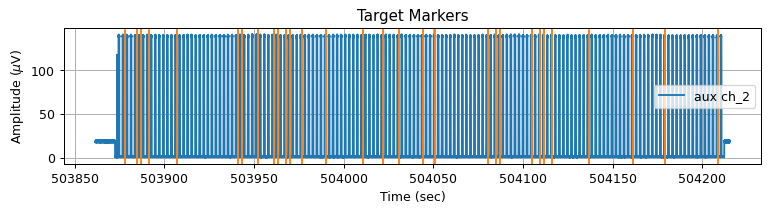

In [33]:
fig, ax = plt.subplots(figsize = (10, 2), dpi = 90)

y = aux_data[:,1]
ax.plot(aux_ts, y, label=aux_chs[1])

for timestamp, marker in zip(marker_ts, marker_data):
            if (marker[0] == '1'):
                ax.axvline(x=timestamp, color='C1')
#             else:
#                 ax.axvline(x=timestamp, color='C3')
    
ax.set_xlabel('Time (sec)')
ax.set_ylabel(r'Amplitude ($\mu$V)')
ax.set_title('Target Markers')
ax.grid(True)
_ = ax.legend()

In [30]:
def get_samples_for_t_range(time_series, time_stamps, t_range):
    low_filt = time_stamps >= t_range[0]
    high_filt = time_stamps <= t_range[1]
    index_range = low_filt == high_filt
    data_range = time_series[index_range]
    ts_range = time_stamps[index_range]
    return data_range, ts_range

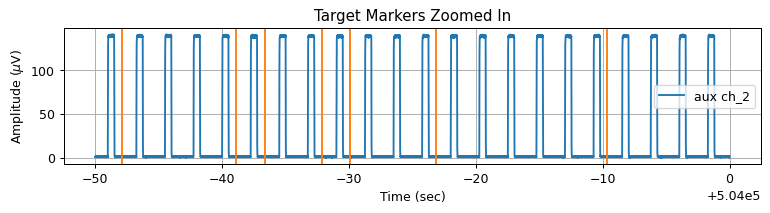

In [36]:
aux_data_zoom, aux_data_zoom_ts = get_samples_for_t_range(aux_data, aux_ts, [503950, 504000])
marker_data_zoom, marker_data_zoom_ts = get_samples_for_t_range(np.array(marker_data), marker_ts, [503950, 504000])

fig, ax = plt.subplots(figsize = (10, 2), dpi = 90)

y = aux_data_zoom[:,1]
ax.plot(aux_data_zoom_ts, y, label=aux_chs[1])

for timestamp, marker in zip(marker_data_zoom_ts, marker_data_zoom):
    if (marker[0] == '1'):
        ax.axvline(x=timestamp, color='C1')
    
ax.set_xlabel('Time (sec)')
ax.set_ylabel(r'Amplitude ($\mu$V)')
ax.set_title('Target Markers Zoomed In')
ax.grid(True)
_ = ax.legend()

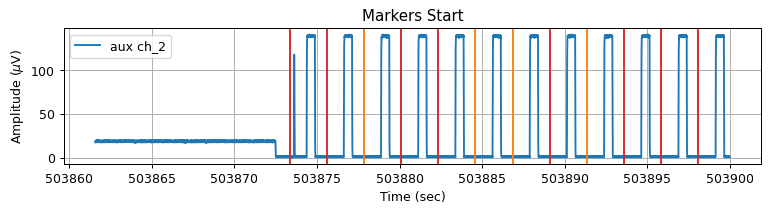

In [38]:
aux_data_zoom, aux_data_zoom_ts = get_samples_for_t_range(aux_data, aux_ts, [503850, 503900])
marker_data_zoom, marker_data_zoom_ts = get_samples_for_t_range(np.array(marker_data), marker_ts, [503850, 503900])

fig, ax = plt.subplots(figsize = (10, 2), dpi = 90)

y = aux_data_zoom[:,1]
ax.plot(aux_data_zoom_ts, y, label=aux_chs[1])

for timestamp, marker in zip(marker_data_zoom_ts, marker_data_zoom):
    if (marker[0] == '1'):
        ax.axvline(x=timestamp, color='C1')
    else:
        ax.axvline(x=timestamp, color='C3')
    
ax.set_xlabel('Time (sec)')
ax.set_ylabel(r'Amplitude ($\mu$V)')
ax.set_title('Markers Start')
ax.grid(True)
_ = ax.legend()

**Note:** The above is not confusing at all...j/k. LSL Markers are coming ahead of the visual photosensor markers. The blink on the photosensor was due to the implementation of a pause that exits and then enters fullscreen, which causes a graphical blink(red). So we should probably remove that false blink from the data.

## Clean the Glitch

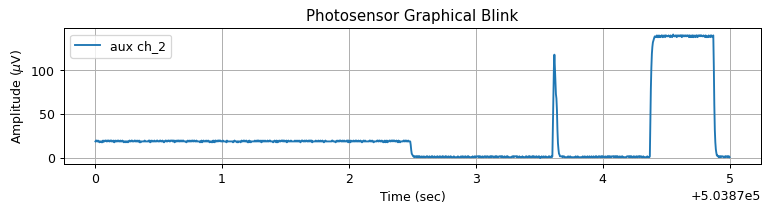

In [39]:
aux_data_zoom, aux_data_zoom_ts = get_samples_for_t_range(aux_data, aux_ts, [503870, 503875])
# aux_data_zoom, aux_data_zoom_ts = get_samples_for_t_range(aux_data, aux_ts, [503873, 503874])

fig, ax = plt.subplots(figsize = (10, 2), dpi = 90)

y = aux_data_zoom[:,1]
ax.plot(aux_data_zoom_ts, y, label=aux_chs[1])
    
ax.set_xlabel('Time (sec)')
ax.set_ylabel(r'Amplitude ($\mu$V)')
ax.set_title('Photosensor Graphical Blink')
ax.grid(True)
_ = ax.legend()

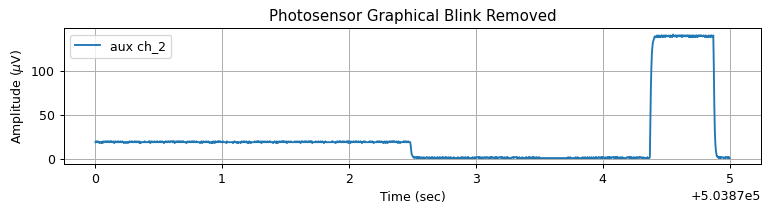

In [41]:
def set_samples_value_for_t_range(time_series, time_stamps, t_range, value):
    low_filt = time_stamps >= t_range[0]
    high_filt = time_stamps <= t_range[1]
    index_range = low_filt == high_filt
    time_series[index_range] = value

aux_data_clean = aux_data.copy()
set_samples_value_for_t_range(aux_data_clean, aux_ts, [503873.5, 503873.7], 1.0)


aux_data_zoom, aux_data_zoom_ts = get_samples_for_t_range(aux_data_clean, aux_ts, [503870, 503875])

fig, ax = plt.subplots(figsize = (10, 2), dpi = 90)

y = aux_data_zoom[:,1]
ax.plot(aux_data_zoom_ts, y, label=aux_chs[1])
    
ax.set_xlabel('Time (sec)')
ax.set_ylabel(r'Amplitude ($\mu$V)')
ax.set_title('Photosensor Graphical Blink Removed')
ax.grid(True)
_ = ax.legend()

## Epochs

In [42]:
# Epoch durations in sec
PRE_STIM = 0.250
POST_STIM = 0.800
PS_THRESHOLD = 70

# Conver AUX Data to binary 1 at the start of stim
onset_ts = []
for i in range(1,len(aux_data_clean)):
    val = int(aux_data_clean[i,1] >= PS_THRESHOLD)
    prev = int(aux_data_clean[i-1,1] >= PS_THRESHOLD)
    t = aux_ts[i]
    if (val-prev == 1):
        onset_ts.append(t)

onset_ts = np.array(onset_ts)
stim_labels = np.array(marker_data).flatten()
print('Number of stimuli match number of markers:', len(onset_ts) == len(stim_labels))

std_stim_epochs = []
odd_stim_epochs = []
std_stim_ps_epochs = []
odd_stim_ps_epochs = []
for ts, label in zip(onset_ts, stim_labels):
    epoch_start = ts - PRE_STIM
    epoch_end = ts + POST_STIM
#     print(epoch_start, epoch_end)
    epoch_tuple = get_samples_for_t_range(eeg_filtered, eeg_ts, [epoch_start, epoch_end])
    sensor_tuple = get_samples_for_t_range(aux_data_clean[:,1], aux_ts, [epoch_start, epoch_end])
    if label == '1':
        odd_stim_epochs.append(epoch_tuple)
        odd_stim_ps_epochs.append(sensor_tuple)
    else:
        std_stim_epochs.append(epoch_tuple)
        std_stim_ps_epochs.append(sensor_tuple)

print(f'{len(std_stim_epochs)} Standard Epochs and {len(odd_stim_epochs)} Odd Ball Epochs')

Number of stimuli match number of markers: True
120 Standard Epochs and 30 Odd Ball Epochs


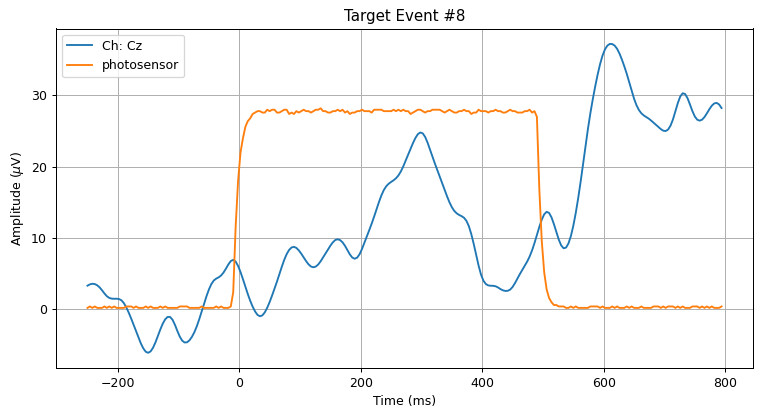

In [43]:
def ms_to_samples(duration, rate=250):
    return round((duration/1000.0) * 250.0)

ep_index = 8

baseline = ms_to_samples(250)
test_epoch = odd_stim_epochs[ep_index][0][:,3]
# test_epoch = std_stim_epochs[7][0][:,3]
baseline_avg = np.mean(test_epoch[0:baseline])
test_epoch = test_epoch - baseline_avg
test_x = [(i*4)-250 for i in range(len(test_epoch))]

fig, ax = plt.subplots(figsize = (10, 5), dpi = 90)

ax.plot(test_x, test_epoch, label='Ch: Cz')
ax.plot(test_x, odd_stim_ps_epochs[ep_index][0]*0.2, label='photosensor')
    
ax.set_xlabel('Time (ms)')
ax.set_ylabel(r'Amplitude ($\mu$V)')
ax.set_title(f'Target Event #{ep_index}')
ax.grid(True)
_ = ax.legend()

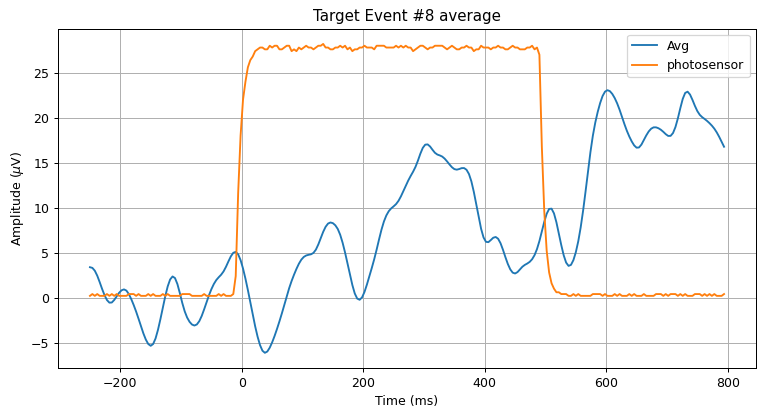

In [58]:
# Channel Oz seemed to be full of noise
# channels = ['PO8', 'P4', 'Fz', 'Cz', 'Pz', 'Oz', 'P3', 'PO7']
chan_sel = [0,1,2,3,4,6,7]

ep_index = 8

# event 7 maybe, 22???
test_epoch = odd_stim_epochs[ep_index][0][:,chan_sel]
base_centered = []
for ch_data in test_epoch.T:
    base_avg = np.mean(ch_data[0:baseline])
    based_data = ch_data - base_avg
    base_centered.append(based_data)
    
base_centered = np.array(base_centered).T
test_epoch_avg = np.mean(base_centered, axis=1)

fig, ax = plt.subplots(figsize = (10, 5), dpi = 90)

ax.plot(test_x, test_epoch_avg, label='Avg')
ax.plot(test_x, odd_stim_ps_epochs[ep_index][0]*0.2, label='photosensor')
    
ax.set_xlabel('Time (ms)')
ax.set_ylabel(r'Amplitude ($\mu$V)')
ax.set_title(f'Target Event #{ep_index} average')
ax.grid(True)
_ = ax.legend()

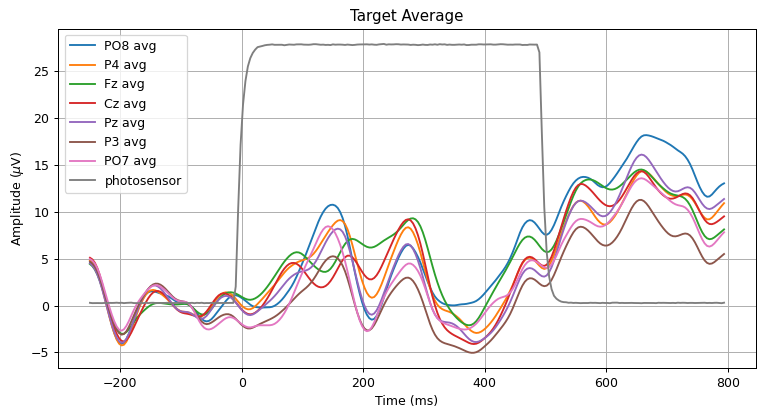

In [57]:
def baseline_center(eeg_event_ch, baseline_duration):
    baseline_samples = ms_to_samples(baseline_duration)
    base_avg = np.mean(eeg_event_ch[0:baseline_samples])
    baseline_centered = eeg_event_ch - base_avg
    return baseline_centered

# test_epoch = odd_stim_epochs[7][0]
all_epochs_by_ch = [[] for ch in channels]
for eeg_event_data, eeg_event_ts in odd_stim_epochs:
    for ch, ch_data in enumerate(eeg_event_data.T):
        b = baseline_center(ch_data, PRE_STIM*1000)
        all_epochs_by_ch[ch].append(b)
        
all_epochs_by_ch = np.array(all_epochs_by_ch)
odd_ball_ch_avg = np.array([np.mean(ch, axis=0) for ch in all_epochs_by_ch])
photosensor_avg = ax.plot(test_x, odd_stim_ps_epochs[ep_index][0]*0.2, label='photosensor')
odd_stim_ps_avg = np.mean(np.array(odd_stim_ps_epochs)[:,0,:], axis=0)
    
# base_centered = np.array(base_centered).T
# test_epoch_avg = np.mean(base_centered, axis=1)

fig, ax = plt.subplots(figsize = (10, 5), dpi = 90)

for ch_i, ch_avg in enumerate(odd_ball_ch_avg[chan_sel]):
    label_i = chan_sel[ch_i]
    channel = channels[label_i]
    ax.plot(test_x, ch_avg, label=channel+' avg')

ax.plot(test_x, odd_stim_ps_avg*0.2, label='photosensor')

ax.set_xlabel('Time (ms)')
ax.set_ylabel(r'Amplitude ($\mu$V)')
ax.set_title('Target Average')
ax.grid(True)
_ = ax.legend()

# odd_stim_ps_avg = np.mean(np.array(odd_stim_ps_epochs)[:,0,:], axis=0)
# odd_stim_ps_avg.shape

## Pz

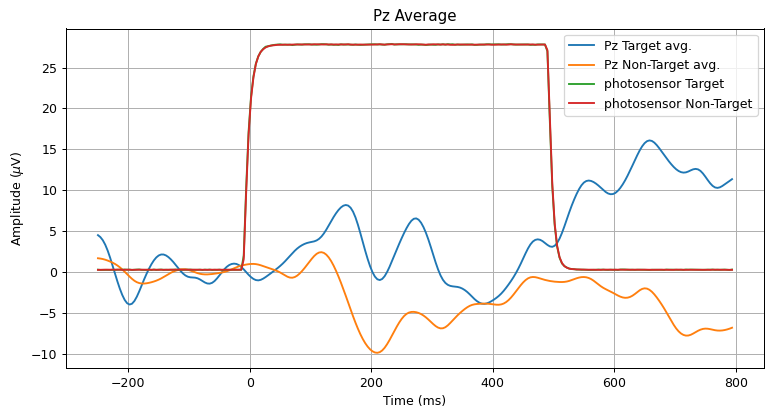

In [60]:
# channels = ['PO8', 'P4', 'Fz', 'Cz', 'Pz', 'Oz', 'P3', 'PO7']
chan_index = 4
ch_label = channels[chan_index]

Pz_odd_epochs = []
Pz_std_epochs = []
for eeg_event_data, eeg_event_ts in odd_stim_epochs:
    b = baseline_center(eeg_event_data[:,chan_index], PRE_STIM*1000)
    Pz_odd_epochs.append(b)
    
for eeg_event_data, eeg_event_ts in std_stim_epochs:
    b = baseline_center(eeg_event_data[:,chan_index], PRE_STIM*1000)
    Pz_std_epochs.append(b)
        
Pz_odd_epochs = np.array(Pz_odd_epochs)
Pz_std_epochs = np.array(Pz_std_epochs)
Pz_odd_epoch_avg = np.mean(Pz_odd_epochs, axis=0)
Pz_std_epoch_avg = np.mean(Pz_std_epochs, axis=0)
odd_stim_ps_avg = np.mean(np.array(odd_stim_ps_epochs)[:,0,:], axis=0)
std_stim_ps_avg = np.mean(np.array(std_stim_ps_epochs)[:,0,:], axis=0)

fig, ax = plt.subplots(figsize = (10, 5), dpi = 90)

ax.plot(test_x, Pz_odd_epoch_avg, label=f'{ch_label} Target avg.')
ax.plot(test_x, Pz_std_epoch_avg, label=f'{ch_label} Non-Target avg.')
ax.plot(test_x, odd_stim_ps_avg*0.2, label='photosensor Target')
ax.plot(test_x, std_stim_ps_avg*0.2, label='photosensor Non-Target')

ax.set_xlabel('Time (ms)')
ax.set_ylabel(r'Amplitude ($\mu$V)')
ax.set_title(f'{ch_label} Average')
ax.grid(True)
_ = ax.legend()
# np.mean(Pz_odd_epochs, axis=0).shape